In [229]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
import seaborn as sns
import pandas as pd 
import numpy as np


In [218]:
dataset= pd.read_csv("indian_liver_patient.csv")
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [219]:
# changing the output name and converting gender to 1 and 0
dataset.rename(columns = {'Dataset':'Output'}, inplace = True)
dataset['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Output
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


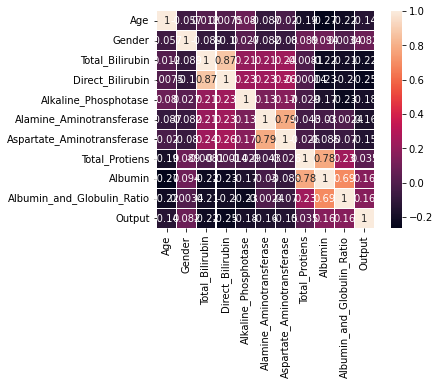

In [220]:
# Use the heatmap function from the seaborn package

sns.heatmap(dataset.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

# Display the Pharma Sector Heatmap
plt.show()

In [221]:
#Method for removing the highly corelated feature
def removeHighlyCorFeatures(dataset, th):
  corr_matrix = dataset.corr().abs()
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  to_drop = [column for column in upper.columns if any(upper[column] > th)]
  print(to_drop)
  dataset.drop(to_drop, axis=1, inplace=True)

In [222]:
#calling the highly correllated feature method.
x = dataset.iloc[:, 0:-1]
removeHighlyCorFeatures(x, 0.8)
x.shape

['Direct_Bilirubin']


(583, 9)

In [223]:
print(dataset.count())

Age                           583
Gender                        583
Total_Bilirubin               583
Direct_Bilirubin              583
Alkaline_Phosphotase          583
Alamine_Aminotransferase      583
Aspartate_Aminotransferase    583
Total_Protiens                583
Albumin                       583
Albumin_and_Globulin_Ratio    579
Output                        583
dtype: int64


In [224]:
# Checking for the null values in our dataset
print(dataset.isnull().sum())


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Output                        0
dtype: int64


In [225]:
#Dropping the 4 null values 
dataset=dataset.dropna()
#Checking for the null values 
print(dataset.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Output                        0
dtype: int64


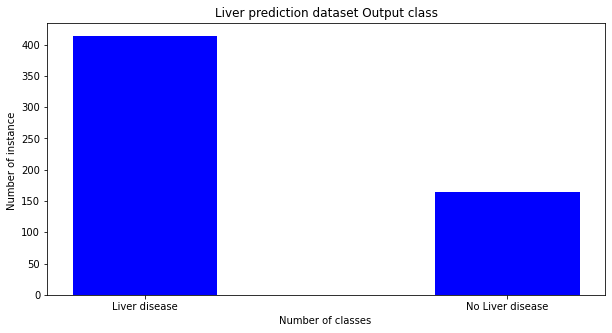

In [226]:
# creating the dataset
courses = ["Liver disease", "No Liver disease"]
values = [sum(dataset["Output"] == 1), sum(dataset["Output"] == 2)]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue', width = 0.4)
plt.xlabel("Number of classes ")
plt.ylabel("Number of instance ")
plt.title("Liver prediction dataset Output class")
plt.show()


In [227]:
# Balancing the dataset.
x = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)
x = x_res
y = y_res
dataset = x
dataset['Output'] = y

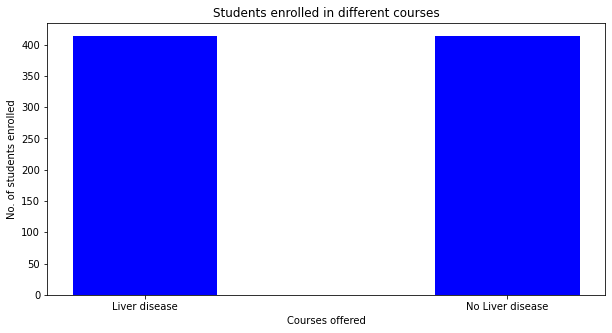

In [204]:
# creating the dataset
courses = ["Liver disease", "No Liver disease"]
values = [sum(dataset["Output"] == 1), sum(dataset["Output"] == 2)]
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(courses, values, color ='green', width = 0.4)
plt.xlabel("Number of classes ")
plt.ylabel("Number of instance ")
plt.title("Liver prediction dataset Output class")
plt.show()


In [205]:
dataset.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Output
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,43.861111,0.201691,2.666892,1.166661,266.850242,66.678744,89.423913,6.491043,3.194624,0.973115,1.500000
std,16.007897,0.401505,5.323617,2.420704,214.055823,155.265068,245.171702,1.021054,0.753074,0.300690,0.500302
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.000000,0.770635,0.200000,168.750000,22.000000,24.000000,5.800000,2.700000,0.800000,1.000000
50%,45.000000,0.000000,0.900000,0.298836,197.000000,31.000000,37.000000,6.600000,3.200000,1.000000,1.500000
75%,57.000000,0.000000,1.900000,0.800000,282.000000,52.000000,69.250000,7.200000,3.800000,1.119051,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [206]:
#Splitting the dataset
X=dataset.iloc[:,0:10]
Y=dataset.iloc[:,10]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=0,test_size=0.2)

#Normalization 
ss= StandardScaler();
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


In [ ]:
# classifier=KNeightborsClassifier(n_neightbours=?,p=2,metric="euclidean")
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

In [208]:
y_pred = classifier.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred) 
# cm = confusion_matrix(Y_test,y_pred)
print("Accuracy",accuracy_score(Y_test,y_pred));

Accuracy 0.6506024096385542


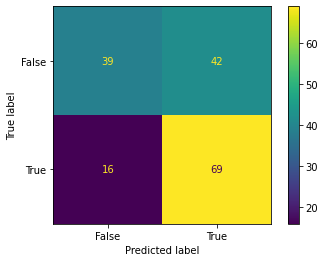

In [209]:
#showing the confusion matrix 
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [210]:
#Logistic Regression!!!! Code with accuracy 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, y_pred))

Accuracy :  0.7048192771084337


In [228]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, Y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [212]:
# finding the accuracy of the svm in our dataset
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7228915662650602


In [213]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred))


Precision: 0.8431372549019608
Recall: 0.5308641975308642


In [214]:
#working with hyper parameter using randomForestClassfier
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid.fit(X_train, Y_train)
print("Optimal parameters %s accuracy score of  %0.2f"
      % (grid.best_params_, grid.best_score_))



Optimal parameters {'max_features': 2, 'n_estimators': 150} accuracy score of  0.80


In [215]:
# from sklearn.ensemble import DecisionTreeClassifier
# from sklearn.ensemble import xgboost

# # For stacking ensembling technique 

# dtc =  DecisionTreeClassifier()
# rfc = RandomForestClassifier()
# knn =  KNeighborsClassifier()
# xgb = xgboost.XGBClassifier()